**Análisis exploratorio de datos con Python**

# 1) Descargar y preparar los datos


In [ ]:
#BIBLIOTECAS
!pip install yfinance PyPortfolioOpt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

* Descargar los precios de cierre de los últimos 3 años pasados (2022-2024) mediante alguna API.

In [ ]:
#Descarga de precios historicos (2022-2024)
tickers = ['GOOGL', 'LLY', 'AMZN', 'VIST', 'GLD'] ;
data = yf.download(tickers, start='2022-01-01', end='2024-12-31')
data = data['Close']


/tmp/ipython-input-1661842140.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  5 of 5 completed


* Calcular los retornos diarios y los retornos acumulados en un pandas dataframe

In [ ]:
# Cálculo de retornos diarios y retornos acumulados
return_diario = data[tickers].pct_change() #Los retornos diarios permiten analizar la variabilidad del rendimiento.
return_acumulado = (1 + return_diario).cumprod()#Los retornos acumulados ayudan a visualizar la evolución del capital invertido.
print(return_diario.dropna().head())
print(return_acumulado.dropna().head())

Ticker         GOOGL       LLY      AMZN      VIST       GLD
Date                                                        
2022-01-04 -0.004083 -0.018106 -0.016916  0.076493  0.007367
2022-01-05 -0.045876 -0.023088 -0.018893 -0.058926 -0.003008
2022-01-06 -0.000200 -0.005064 -0.006711  0.020258 -0.012244
2022-01-07 -0.005303  0.000656 -0.004288  0.030686  0.004551
2022-01-10  0.012061  0.002351 -0.006570 -0.010508  0.003040
Ticker         GOOGL       LLY      AMZN      VIST       GLD
Date                                                        
2022-01-04  0.995917  0.981894  0.983084  1.076493  1.007367
2022-01-05  0.950228  0.959224  0.964511  1.013060  1.004337
2022-01-06  0.950038  0.954366  0.958038  1.033582  0.992039
2022-01-07  0.945000  0.954992  0.953930  1.065298  0.996554
2022-01-10  0.956398  0.957237  0.947663  1.054104  0.999584


* Preparar y plotear una matriz de covarianzas que muestre la relación entre los
rendimientos de los activos durante este periodo.


Matriz de covarianzas:
Ticker     GOOGL       LLY      AMZN      VIST       GLD
Ticker                                                  
GOOGL   0.000426  0.000071  0.000324  0.000087  0.000022
LLY     0.000071  0.000329  0.000091  0.000042  0.000006
AMZN    0.000324  0.000091  0.000584  0.000121  0.000029
VIST    0.000087  0.000042  0.000121  0.001029  0.000059
GLD     0.000022  0.000006  0.000029  0.000059  0.000084


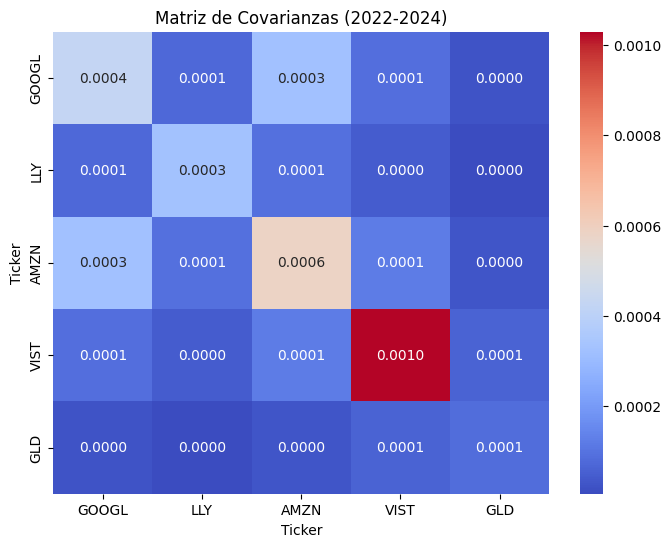

In [ ]:
#Matriz de covarianzas (retornos)
#La covarianza entre activos permite identificar cómo se mueven conjuntamente,
#clave para construir portafolios diversificados.

data_periodo = return_diario.loc["2022-01-01": "2024-12-31"]
cov_matrix = data_periodo.cov()

print("Matriz de covarianzas:")
print(cov_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".4f", cmap='coolwarm')
plt.title('Matriz de Covarianzas (2022-2024)')
plt.show()

* Interpretar los resultados.

1.   GOOGL y AMZN: presentan las covarianzas más altas entre sí, lo que indica que tienden a moverse en la misma dirección y reaccionan de manera similar a las condiciones del mercado.
2.   GLD y VIST: presentan covarianzas significativamente más bajas respecto a las acciones tecnológicas, lo que evidencia un mayor aporte de diversificación.
3. Una combinación de acciones de crecimiento (GOOGL, AMZN), sectores defensivos (LLY) y activos con baja correlación (GLD, VIST) permite construir un portafolio más equilibrado y adecuado para un perfil moderado.





* Preparar y mostrar estadísticas descriptivas de los activos.


In [ ]:
#Cambio de idioma y printeo de las medidas estadisticas
stats = return_diario.describe()
stats.rename(index={
    "count": "cantidad",
    "mean": "media",
    "std": "desvio_estandar",
    "min": "mínimo",
    "25%": "percentil_25",
    "50%": "mediana",
    "75%": "percentil_75",
    "max": "máximo"
}, inplace=True)

print(stats)

Ticker                GOOGL         LLY        AMZN        VIST         GLD
cantidad         751.000000  751.000000  751.000000  751.000000  751.000000
media              0.000586    0.001597    0.000640    0.003591    0.000518
desvio_estandar    0.020637    0.018145    0.024161    0.032085    0.009178
mínimo            -0.095094   -0.062806   -0.140494   -0.109813   -0.035683
percentil_25      -0.011627   -0.008617   -0.012647   -0.015774   -0.005007
mediana            0.001140    0.001082    0.000344    0.001479    0.000508
percentil_75       0.011502    0.010411    0.014119    0.022697    0.005906
máximo             0.102244    0.148696    0.135359    0.179340    0.032148


* Utilizar algún tipo de gráfico que conozcan para ver estas estadísticas.

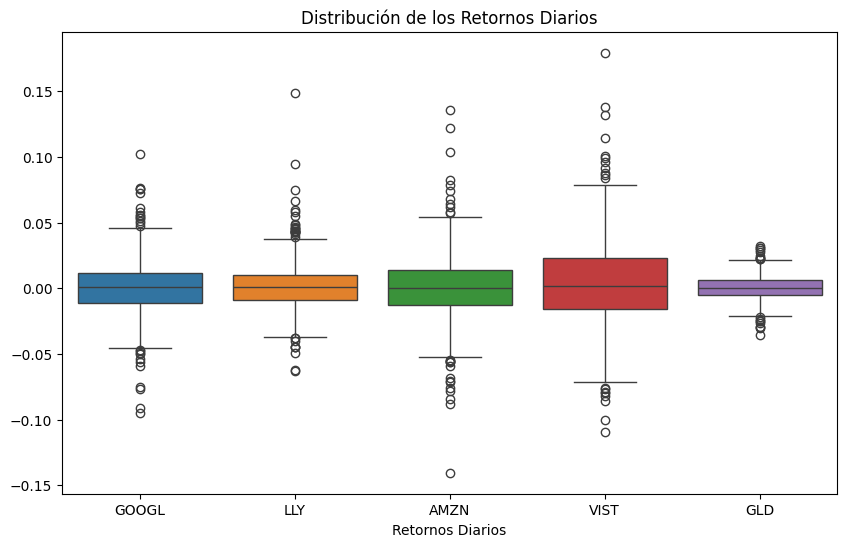

In [ ]:
#Grafico
plt.figure(figsize=(10,6))
sns.boxplot(data=return_diario)
plt.title('Distribución de los Retornos Diarios')
plt.xlabel('Retornos Diarios')
plt.show()

* Graficar la evolución histórica de los precios y de los retornos acumulados.

<Figure size 1000x600 with 0 Axes>

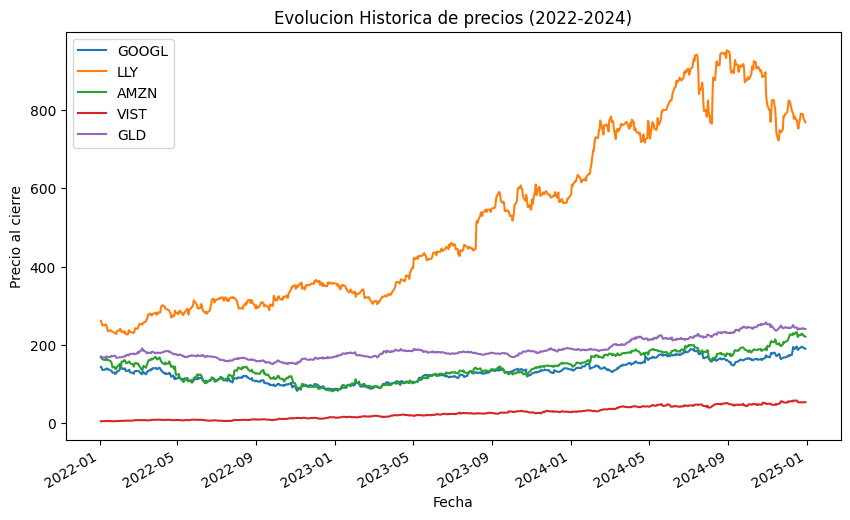

In [ ]:
#Grafico de la evolucion historica
plt.figure(figsize=(10, 6))
data[tickers].plot(figsize=(10, 6))
plt.title("Evolucion Historica de precios (2022-2024)")
plt.xlabel("Fecha")
plt.ylabel("Precio al cierre")
plt.legend(tickers)
plt.show()

* Analizar.


1.   LLY: es el activo que mas se aprecia, su pendiente es muy marcada y sostendida, por lo que interpreto que es un crecimiento estable en los ultimos años.
2.   AMZN y GOOGL: ambas presentan un comportamiento ciclico normal para empresas tecnologicas grandes. Muestran una caida en 2022, un piso en 2023 y una recuperacion progresiva a partir de eso.
3.  VIST: esta empresa no muestra ciclos marcados como las tecnológicas, su movimiento es mas estable y con una pendiente positiva bastante consistente.
4. GLD: se mantiene relativamente estable durante todo el periodo, esto es tipico del oro, quiza utilizado como un activo refugio, sirviendo como estabilizador de la cartera.


# 2) Construcción y optimización de portafolio

* Calcular el retorno anual esperado

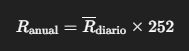

In [ ]:
#2) Construcción y optimización de portafolio
return_anual = return_diario.mean() * 252 #en el anual se usa 252 y no 365 porque son los dias habiles
print(return_anual)

Ticker
GOOGL    0.147740
LLY      0.402398
AMZN     0.161177
VIST     0.904975
GLD      0.130531
dtype: float64


* Calcular la volatilidad anualizada

​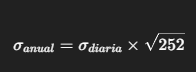

In [ ]:
#Calculo de volatilidad
volat_anual = return_diario.std() * np.sqrt(252)
print(volat_anual)

Ticker
GOOGL    0.327600
LLY      0.288038
AMZN     0.383539
VIST     0.509340
GLD      0.145689
dtype: float64


* Implementar una optimización de frontera eficiente usando PyPortfolioOpt, para
encontrar el portfolio de mínima varianza y el portfolio con máximo Sharpe.


In [ ]:
# Librerías necesarias
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
import matplotlib.pyplot as plt

# Retorno anual esperado
mu = expected_returns.mean_historical_return(data)

# Matriz de covarianza
S = risk_models.sample_cov(data)

#MIN VAR
ef_min = EfficientFrontier(mu, S)
weights_min_var = ef_min.min_volatility()
cleaned_weights_min_var = ef_min.clean_weights()
ret_min_var, vol_min_var, sharpe_min_var = ef_min.portfolio_performance()

#MAX SHARPE
ef_sharpe = EfficientFrontier(mu, S)
weights_max_sharpe = ef_sharpe.max_sharpe()
cleaned_weights_max_sharpe = ef_sharpe.clean_weights()
ret_max_sh, vol_max_sh, sharpe_ratio = ef_sharpe.portfolio_performance()

* Graficar la frontera eficiente y marcar los dos portafolios óptimos.

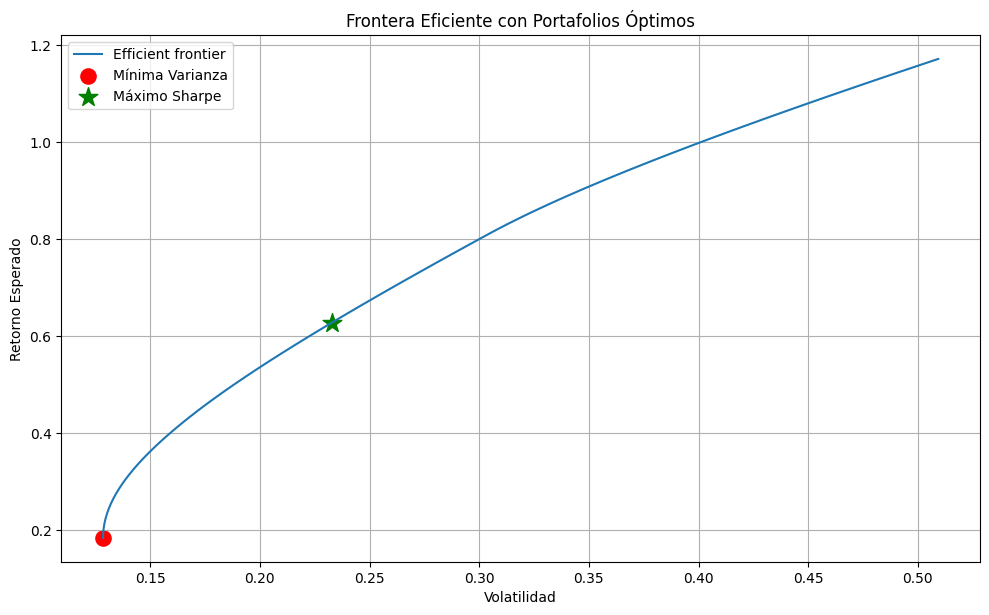

In [ ]:
#GRAFICO
fig, ax = plt.subplots(figsize=(10, 6))

ef_grafico = EfficientFrontier(mu, S)
plotting.plot_efficient_frontier(ef_grafico, show_assets=False, ax=ax)

ax.scatter(vol_min_var, ret_min_var, marker="o", s=120, c="red", label="Mínima Varianza")
ax.scatter(vol_max_sh, ret_max_sh, marker="*", s=200, c="green", label="Máximo Sharpe")

ax.set_title("Frontera Eficiente con Portafolios Óptimos")
ax.set_xlabel("Volatilidad")
ax.set_ylabel("Retorno Esperado")
ax.legend()
ax.grid(True)

plt.show()

# 3) CAPM

* Usa como benchmark de mercado al SP500 (^GSPC) y calcula los retornos del
mercado, consultando para el mismo periodo mediante API.


In [ ]:
#Lista de acciones
tickers = ['GOOGL', 'LLY', 'AMZN', 'VIST', 'GLD']
benchmark = '^GSPC'

#Precios ajustados
data = yf.download(tickers + [benchmark],
                   start='2022-01-01',
                   end='2024-12-31')['Close']

data = data.dropna()

#Retorno diario (incluye el benchmark)
returns = data.pct_change().dropna()

#Exceso de retorno (5% anual)
rf_diaria = (1 + 0.05) ** (1 / 252) - 1

#Exceso de retorno de cada activo
for t in tickers:
    returns[t + '_exceso'] = returns[t] - rf_diaria

#Exceso de retorno del mercado
returns['MKT_exceso'] = returns[benchmark] - rf_diaria

returns.head(10)


/tmp/ipython-input-3099840222.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers + [benchmark],
[*********************100%***********************]  6 of 6 completed


Ticker,AMZN,GLD,GOOGL,LLY,VIST,^GSPC,GOOGL_exceso,LLY_exceso,AMZN_exceso,VIST_exceso,GLD_exceso,MKT_exceso
Date,,,,,,,,,,,,
2022-01-04,-0.016916,0.007367,-0.004083,-0.018106,0.076493,-0.000630,-0.004277,-0.018300,-0.017109,0.076299,0.007173,-0.000823
2022-01-05,-0.018893,-0.003008,-0.045876,-0.023088,-0.058926,-0.019393,-0.046070,-0.023281,-0.019087,-0.059119,-0.003201,-0.019586
2022-01-06,-0.006711,-0.012244,-0.000200,-0.005064,0.020258,-0.000964,-0.000393,-0.005258,-0.006905,0.020064,-0.012438,-0.001157
2022-01-07,-0.004288,0.004551,-0.005303,0.000656,0.030686,-0.004050,-0.005497,0.000462,-0.004481,0.030492,0.004358,-0.004244
2022-01-10,-0.006570,0.003040,0.012061,0.002351,-0.010508,-0.001441,0.011867,0.002157,-0.006764,-0.010702,0.002847,-0.001635
2022-01-11,0.024002,0.012065,0.007691,0.008497,0.056637,0.009160,0.007497,0.008303,0.023808,0.056443,0.011871,0.008966
2022-01-12,-0.000937,0.002643,0.012126,-0.024398,0.028476,0.002818,0.011933,-0.024591,-0.001131,0.028282,0.002449,0.002624
2022-01-13,-0.024170,-0.003397,-0.020105,-0.024422,0.000000,-0.014244,-0.020299,-0.024615,-0.024363,-0.000194,-0.003591,-0.014437
2022-01-14,0.005731,-0.002880,0.006447,-0.022229,0.011401,0.000820,0.006253,-0.022423,0.005538,0.011207,-0.003073,0.000626


* Calcula el β de mercado de los activos mediante una regresión lineal.


In [ ]:
#Calculo de beta (β)
excess_returns = returns.sub(rf_diaria)
betas = {}

for ticker in tickers:
    X = sm.add_constant(excess_returns[benchmark])
    y = excess_returns[ticker]
    model = sm.OLS(y, X).fit()
    betas[ticker] = model.params[1]

/tmp/ipython-input-3013120548.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[ticker] = model.params[1]
/tmp/ipython-input-3013120548.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[ticker] = model.params[1]
/tmp/ipython-input-3013120548.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[ticker] = model.params[1]
/tmp/ipython-input-3013120548.py:8: FutureWarning: Series.__getitem__ treating keys as positio

In [ ]:
betas

{'GOOGL': np.float64(1.3353679357347064),
 'LLY': np.float64(0.5756284349236206),
 'AMZN': np.float64(1.6067918606889482),
 'VIST': np.float64(0.8023136026717748),
 'GLD': np.float64(0.13593496261964147)}

* Interpreta esos β, y analiza si se trata de activos defensivos o agresivos.

Beta es una medida de sensibilidad de los activos al mercado, seria una especie de elasticidad de los activos frente al mercado.
En clase vimos:

* Si β₁ ≈ 1 → AAPL se comporta como el mercado.
* Si β₁ > 1 → AAPL es más volátil (más riesgosa).
* Si β₁ < 1 → AAPL es más estable (menos sensible al mercado)

Por lo que se puede deducir que los beta menores a 1 son activos defensivos, mientras que los beta mayores a 1 son activos agresivos.

* GOOGL = 1.3353, indica que este activo es agresivo
* LLY = 0.5756, indica que este activo es defensivo
* AMZN = 1.6067, indica que este activo es agresivo
* VIST = 0.8023, indica que este activo es defensivo
* GLD = 0.1359, indica que este activo es defensivo

* Si suponemos que para los próximos 12 meses se espera:

1. Retorno esperado del mercado: +8% .
2. Tasa libre de riesgo: 3%


In [ ]:
betas = {
    'GOOGL': 1.3353,
    'LLY': 0.5756,
    'AMZN': 1.6067,
    'VIST': 0.8023,
    'GLD' : 0.1359
}

Rf = 0.03 #Tasa libre de riesgo
Rm = 0.08 #Tasa de rotorno esperada

#CAPM
market_premium = Rm - Rf
capm_returns = {}

for ticker, beta in betas.items():
  capm_returns[ticker] = Rf + beta * market_premium

#Mostrar tabla
df_capm = pd.DataFrame({
    "Beta" : betas,
    "Retorno_CAPM" : capm_returns
})

* Según los β calculados, ¿qué retorno esperaría CAPM para los activos? ¿De cuáles
convendría tener más y de cuáles menos?

In [ ]:
#DataFrame para ver mejor los resultados
print("Retorno esperado según CAPM para cada activo:")
print(df_capm)

Retorno esperado según CAPM para cada activo:
         Beta  Retorno_CAPM
GOOGL  1.3353      0.096765
LLY    0.5756      0.058780
AMZN   1.6067      0.110335
VIST   0.8023      0.070115
GLD    0.1359      0.036795


Para saber de que activos le convendria tener mas hay que tener en cuenta el prefil del inversor, pero el modelo CAPM nos da una guia para tener en cuenta.
* (β > 1), este tipo de activos (agresivos), son los que generan mayor retorno a mayor riesgo, en los activos estudiados serian:
1. GOOGL.
2. AMZN.

* (β < 1), este tipo de activos (defensivos), son los que generan menor retorno pero a menor riego, en los activos estudiados serian:
1. VIST.
2. LLY.
3. GLD.

_ Si el objetivo es maximizar retorno según CAPM:

Más: AMZN > GOOGL > VIST

Menos: LLY y especialmente GLD

_ Si el objetivo es bajar riesgo:

Más: GLD, LLY

Menos: AMZN y GOOGL

* Calcular el ratio de Treynor utilizando como retorno esperado de los activos el valor
obtenido por CAPM.

In [ ]:
#Calculo del Ratio de Treynor
betas = {
    'GOOGL': 1.3353,
    'LLY': 0.5756,
    'AMZN': 1.6067,
    'VIST': 0.8023,
    'GLD' : 0.1359
}

capm_returns = {
    'GOOGL': 0.0968,
    'LLY': 0.0538,
    'AMZN': 0.1030,
    'VIST' : 0.0621,
    'GLD' : 0.0334
}

treynor = {}

for ticker in betas:
    treynor[ticker] = (capm_returns[ticker] - Rf) / betas[ticker]

df_treynor = pd.DataFrame({
    "Beta": betas,
    "CAPM_Return": capm_returns,
    "Treynor": treynor
})

df_treynor

,Beta,CAPM_Return,Treynor
GOOGL,1.3353,0.0968,0.050026
LLY,0.5756,0.0538,0.041348
AMZN,1.6067,0.1030,0.045435
VIST,0.8023,0.0621,0.040010
GLD,0.1359,0.0334,0.025018


* Comparar los resultados entre los distintos ratios y analizar.

El ratio de Treynor mide el rendimiento ajustado al riesgo, es util cuando el inversor tiene una cartera diversificada y se quiere medir el rendimiento ajustado por el riesgo.
En nuestros resultados (ordendos de mayor a menor).


1. GOOGL → 0.0499 (más eficiente por riesgo de mercado)

2. AMZN → 0.0453

3. LLY → 0.0413

4. VIST → 0.0399

5. GLD → 0.0250 (menos eficiente)

Por lo tanto;

GOOGL es el mejor compensado por riesgo sistematico según CAPM.

AMZN tambien rinde bien, aunque un poco menos eficiente que GOOGL.

LLY y VIST ofrecen compensación razonable.

GLD es el peor en Treynor porque su β es muy chico, y su retorno extra sobre Rf tambien lo es.



# 4) Conclusion Final

El analisis hecho hasta aqui evidencia una combinacion heterogenea de activos con distintos perfiles de riesgo, lo que permite construir un portafolio diversificado capaz de equilibrar crecimiento y estabilidad frente a diferentes condiciones del mercado o ciclos economicos.

1.   GOOGL y AMZN; aportan crecimiento a costo de un mayor riesgo para la cartera del inversor. Sus betas elevadas los convierten en activos agresivos, útiles para capturar retornos superiores pero con mayor exposición a shocks sistémicos.
2.   GLD y LLY; aportan estabilidad a la cartera gracias a su menor volatilidad y betas reducidas. Ambos actúan como contrapeso natural ante la naturaleza más volátil de los activos tecnológicos.

En el analisis con PyPortfolioOpt se muestra que para un perfil moderado la mejor combinacion requiere ponderar activos defensivos y agresivos segun el perfil del inversor.
El CAPM y el ratio de Treynor refuerzan esta idea, debido a que el retorno ajustado por el riesgo favorece activos con betas intermedias.
En conclusion, el portafolio optimo se construye equilibrando riesgo y diversificacion, evitando concentraciones excesivas, con el objetivo de lograr una estructura consistente. Esto permite obtener un rendimiento esperado competitivo con un nivel de riesgo coherente y sostenible en el tiempo, aumentando la robustez de la estrategia ante escenarios de mercado tanto alcistas como adversos.

